In [11]:
import pandas as pd
from pathlib import Path 


data_dir = r'C:\SportsProject\premier_team_analysis\data'

player_stats_df = pd.read_csv(f'{data_dir}/player_stats.csv')
player_salaries_df = pd.read_csv(f'{data_dir}/player_salaries.csv')
team_stats_df = pd.read_csv(f'{data_dir}/team_stats.csv')
standings_df = pd.read_csv(f'{data_dir}/standings.csv')
fixtures_df = pd.read_csv(f'{data_dir}/fixtures.csv')
team_salary_df = pd.read_csv(f'{data_dir}/team_salary.csv')
player_possession_stats_df = pd.read_csv(f'{data_dir}/player_possession_stats.csv')
team_possession_stats_df = pd.read_csv(f'{data_dir}/team_possession_stats.csv')

In [12]:
#Code from https://www.kaggle.com/code/astonvaz/stats-don-t-lie-premier-league-24-25-deep-dive

df_dict = {
    'team_possession_stats': team_possession_stats_df,
    'player_possession_stats': player_possession_stats_df,
    'team_salary': team_salary_df,
    'standings': standings_df,
    'team_stats': team_stats_df,
    'player_salaries': player_salaries_df,
    'fixtures': fixtures_df,
    'player_stats': player_stats_df
}

def print_df_shape(name, dataframe):
    """Displays dataframe name and shape"""
    print(f"{name} Dataset shape: {dataframe.shape}\n")
    
def display_column_names(name, dataframe):
    """Displays column names in a dataframe"""
    print(f"{name} columns:\n{dataframe.columns.tolist()} \n")
    
def display_first_five_rows(table_name, dataframe):
    print(f"{table_name} data:")
    print(f"{dataframe.head(5)}\n\n")
    
def display_data_types(name, dataframe):
    print(f"{name} data types:")
    print(f"{dataframe.info()}\n")
    
    
for name, dataframe in df_dict.items():
    print_df_shape(name, dataframe)
    display_column_names(name, dataframe)
    display_first_five_rows(name, dataframe)
    display_data_types(name, dataframe)
    

team_possession_stats Dataset shape: (20, 10)

team_possession_stats columns:
['team', 'possession', 'touches', 'deffensive_touches', 'middle_touches', 'attacking_touches', 'attempted_take_ons', 'successful_take_ons', 'carries', 'total_distance_carried'] 

team_possession_stats data:
          team  possession  touches  deffensive_touches  middle_touches  \
0      Arsenal        56.8    23363                5960           10107   
1  Aston Villa        51.0    21291                7113            9119   
2  Bournemouth        48.1    20971                6300            9029   
3    Brentford        47.8    20864                8064            7830   
4     Brighton        52.0    22986                7355            9983   

   attacking_touches  attempted_take_ons  successful_take_ons  carries  \
0               7471                 706                  310    13816   
1               5275                 706                  317    12118   
2               5902                 651  

c:\Users\bield\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bield\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bield\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bield\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

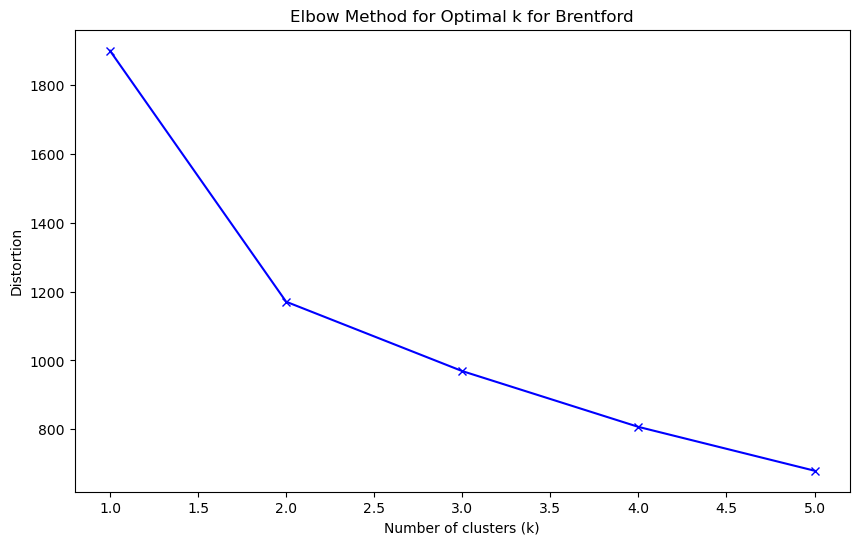

c:\Users\bield\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


'\nCluster Performance Summary:'

opp_possession             opp_touches              team_score  \
                  mean       std          mean          std       mean   
cluster                                                                  
0.0          50.504000  2.272078  22387.245714   966.888945   1.714286   
1.0          42.240000  1.914960  19434.000000  1083.061877   1.540000   
2.0          56.969524  3.020765  24691.542857  1576.612136   0.866667   

                  opponent_score             is_home    is_win   is_loss  
              std           mean       std      mean      mean      mean  
cluster                                                                   
0.0      1.316811       1.222857  1.012305  0.045714  0.474286  0.285714  
1.0      1.274616       1.130000  1.203152  0.050000  0.450000  0.260000  
2.0      0.821194       2.314286  1.227210  0.057143  0.066667  0.723810

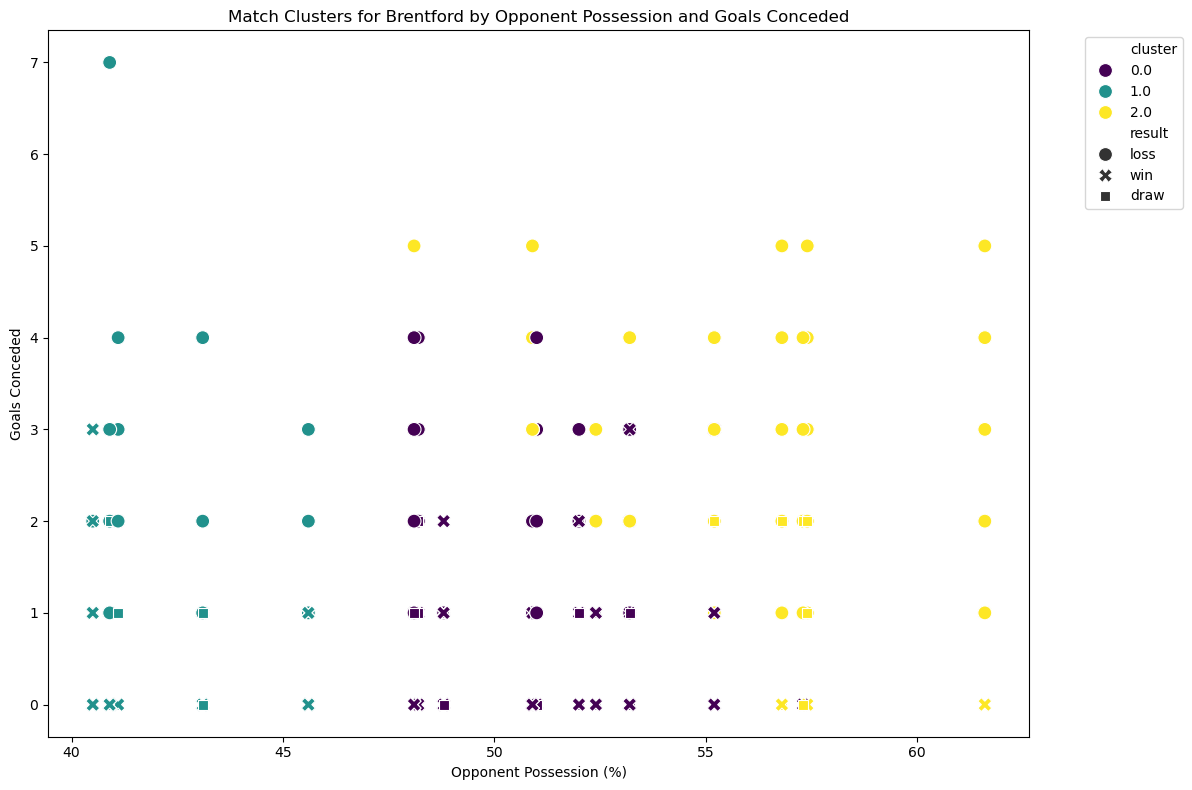


Overall Team Performance Analysis:

Home vs Away Performance:


,is_win,is_loss,team_score,opponent_score
is_home,,,,
Away,0.349030,0.404432,1.398892,1.481994
Home,0.473684,0.315789,2.105263,1.842105



Performance by Opponent Possession:


C:\Users\bield\AppData\Local\Temp\ipykernel_36792\1604782746.py:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  possession_performance = merged_data.groupby('opp_possession_group').agg({


,is_win,is_loss,team_score,opponent_score
opp_possession_group,,,,
<40%,NaN,NaN,NaN,NaN
40-50%,0.494444,0.255556,1.638889,1.144444
50-60%,0.238889,0.516667,1.250000,1.772222
>60%,0.150000,0.650000,1.250000,2.250000



Last 5 Games Performance:


,wins,losses,avg_goals_scored,avg_goals_conceded
Last 5,3,1,2.0,1.2


In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_team_performance(df_dict, team_name):
    """
    Analyze team performance patterns including clustering of match types.
    
    Args:
        df_dict (dict): Dictionary containing all dataframes
        team_name (str): Name of team to analyze
    """
    # Merge relevant data
    fixtures = df_dict['fixtures']
    team_stats = df_dict['team_stats']
    team_possession = df_dict['team_possession_stats']
    standings = df_dict['standings']
    
    # Prepare fixtures data with home/away indicators
    fixtures['is_home'] = fixtures['Home'] == team_name
    fixtures['opponent'] = np.where(fixtures['is_home'], fixtures['Away'], fixtures['Home'])
    fixtures['team_score'] = np.where(fixtures['is_home'], fixtures['HomeScore'], fixtures['AwayScore'])
    fixtures['opponent_score'] = np.where(fixtures['is_home'], fixtures['AwayScore'], fixtures['HomeScore'])
    fixtures['result'] = np.select(
        [fixtures['team_score'] > fixtures['opponent_score'], 
         fixtures['team_score'] == fixtures['opponent_score']],
        ['win', 'draw'],
        default='loss'
    )
    
    # Merge with team stats (assuming stats are per-match)
    # For this example, we'll use team_stats as season aggregates
    # In a real implementation, you'd want per-match stats
    
    # Get opponent possession stats
    opponent_possession = team_possession.rename(
        columns={col: f'opp_{col}' for col in team_possession.columns if col != 'team'}
    )
    
    # Merge all data
    merged_data = fixtures.merge(
        opponent_possession, 
        left_on='opponent', 
        right_on='team', 
        how='left'
    ).drop(columns=['team'])
    
    # Feature engineering
    merged_data['goal_difference'] = merged_data['team_score'] - merged_data['opponent_score']
    merged_data['is_win'] = (merged_data['result'] == 'win').astype(int)
    merged_data['is_loss'] = (merged_data['result'] == 'loss').astype(int)
    
    # Select features for clustering
    cluster_features = [
        'opp_possession', 'opp_touches', 'opp_attacking_touches',
        'team_score', 'opponent_score'
    ]
    
    # Prepare data for clustering
    cluster_data = merged_data[cluster_features].dropna()
    
    if len(cluster_data) == 0:
        print("Not enough data for clustering.")
        return
    
    # Standardize features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)
    
    # Determine optimal number of clusters using elbow method
    distortions = []
    K_range = range(1, min(6, len(cluster_data)))
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title(f'Elbow Method for Optimal k for {team_name}')
    plt.show()
    
    # Use 3 clusters (or let user choose based on elbow)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add clusters back to data
    cluster_data['cluster'] = clusters
    merged_data.loc[cluster_data.index, 'cluster'] = clusters
    
    # Analyze cluster characteristics
    cluster_summary = merged_data.groupby('cluster').agg({
        'opp_possession': ['mean', 'std'],
        'opp_touches': ['mean', 'std'],
        'team_score': ['mean', 'std'],
        'opponent_score': ['mean', 'std'],
        'is_home': ['mean'],
        'is_win': ['mean'],
        'is_loss': ['mean']
    })
    
    display("\nCluster Performance Summary:")
    display(cluster_summary)
    
    # Visualize clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=merged_data.dropna(),
        x='opp_possession',
        y='opponent_score',
        hue='cluster',
        style='result',
        palette='viridis',
        s=100
    )
    plt.title(f'Match Clusters for {team_name} by Opponent Possession and Goals Conceded')
    plt.xlabel('Opponent Possession (%)')
    plt.ylabel('Goals Conceded')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Overall team performance analysis
    print("\nOverall Team Performance Analysis:")
    
    # 1. Home vs Away performance
    home_away = merged_data.groupby('is_home').agg({
        'is_win': 'mean',
        'is_loss': 'mean',
        'team_score': 'mean',
        'opponent_score': 'mean'
    }).rename(index={0: 'Away', 1: 'Home'})
    print("\nHome vs Away Performance:")
    display(home_away)
    
    # 2. Performance against different possession teams
    merged_data['opp_possession_group'] = pd.cut(
        merged_data['opp_possession'],
        bins=[0, 40, 50, 60, 100],
        labels=['<40%', '40-50%', '50-60%', '>60%']
    )
    
    possession_performance = merged_data.groupby('opp_possession_group').agg({
        'is_win': 'mean',
        'is_loss': 'mean',
        'team_score': 'mean',
        'opponent_score': 'mean'
    })
    print("\nPerformance by Opponent Possession:")
    display(possession_performance)
    
    # 3. Last 5 games performance
    last5 = merged_data.sort_values('Date').tail(5)
    last5_performance = {
        'wins': last5['is_win'].sum(),
        'losses': last5['is_loss'].sum(),
        'avg_goals_scored': last5['team_score'].mean(),
        'avg_goals_conceded': last5['opponent_score'].mean()
    }
    print("\nLast 5 Games Performance:")
    display(pd.DataFrame(last5_performance, index=['Last 5']))
    
    return merged_data, cluster_summary


team_performance, clusters = analyze_team_performance(df_dict, "Brentford")


